### Taking the best performing of BRCA dataset and applying our findings to PPMI transcripts data

In [1]:
import sys
import importlib
import pickle

# data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data analysis
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# pytorch specific
import torch
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# project specific
sys.path.append('../')
from src import config
from src.utils import visualisation, benchmark, helpers, monitoring, experiment
from src.models import model


from matplotlib.animation import FuncAnimation
from IPython.display import HTML

pd.options.display.width = 1000
DEVICE = torch.device(config["DEVICE"])

In [ ]:
best_performing_config = {'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}
data_param = "../workfiles/light_BRCA_ds.pkl"

e = experiment.Experiment(data_param, best_performing_config, verbose = 2, n_epoch = 3000)
e.run()

### Let's have a look at our metrics

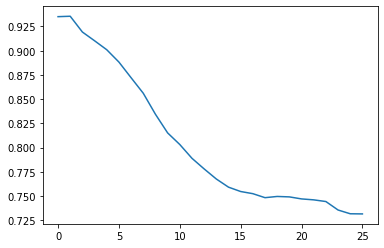

In [6]:
plt.plot([timepoint["hopkins"] for timepoint in e.monitor.metrics])


We litterally expect the opposite

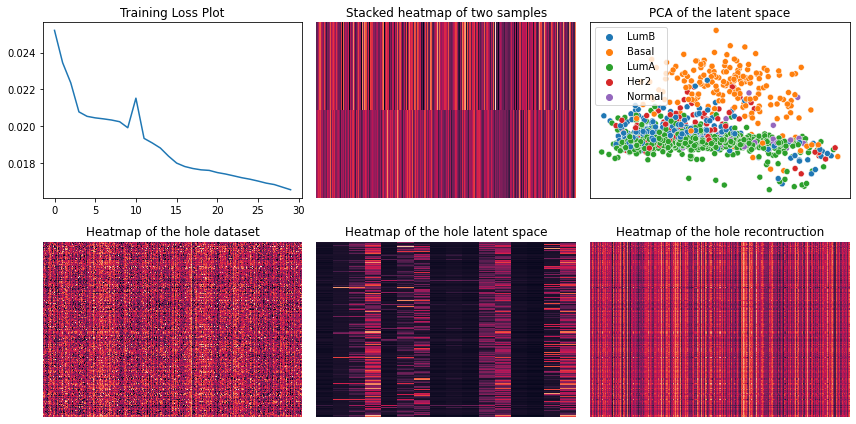

In [11]:
importlib.reload(visualisation)
visualisation.post_training_viz(e.data, e.dataloader, e.model, DEVICE, e.monitor.train_res_recon_error, labels = e.metadata["subtypes"])

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


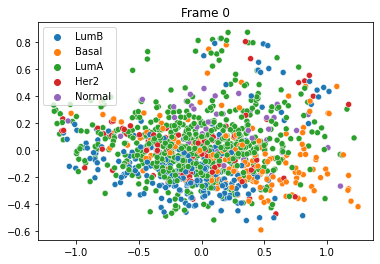

In [13]:
# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Define an update function for the animation
def update(frame):
    ax.clear()
    ax.set_title(f'Frame {frame}')
    
    # Get the PCA result for the current frame
    pca_result = e.monitor.frames[frame]
    
    # Scatter plot of PCA results with color based on index
    sns.scatterplot(x=pca_result[:, 1], y=pca_result[:, 2], hue=e.metadata["subtypes"])


# Create the animation
ani = FuncAnimation(fig, update, frames=len(e.monitor.frames), repeat=True)

# Display the animation as HTML
HTML(ani.to_jshtml())

# now we use PPMI data

input shape : 11835
(1521, 11835)
(1521, 1, 11835)
train data: 1521


/opt/homebrew/anaconda3/envs/thesis/lib/python3.9/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Running the following configuration:
../workfiles/PPMI_genes.pkl
{'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}


 30%|███       | 9/30 [03:20<07:25, 21.21s/it]

Silhouette score for 5 clusters: 0.3467080295085907


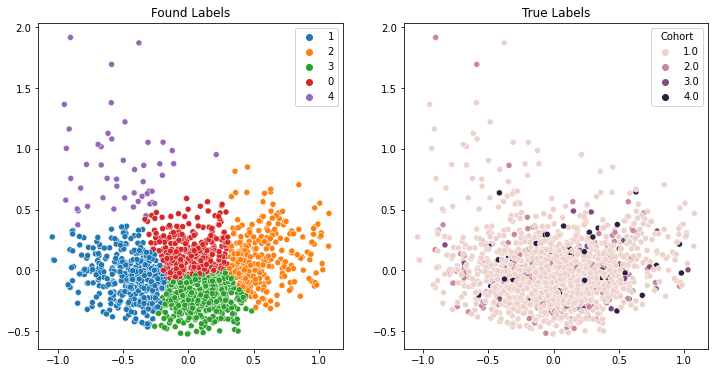

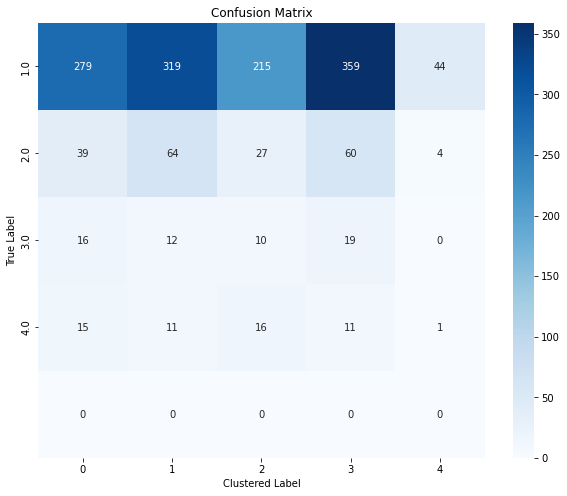

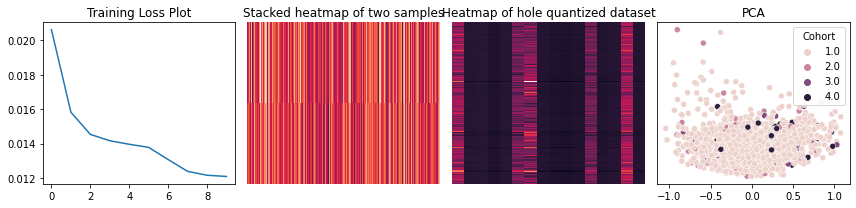

 33%|███▎      | 10/30 [03:43<07:20, 22.01s/it]

HOPKINS STATISTIC 0.9532204523960705
Silhouette score for 5 clusters: 0.42394784092903137


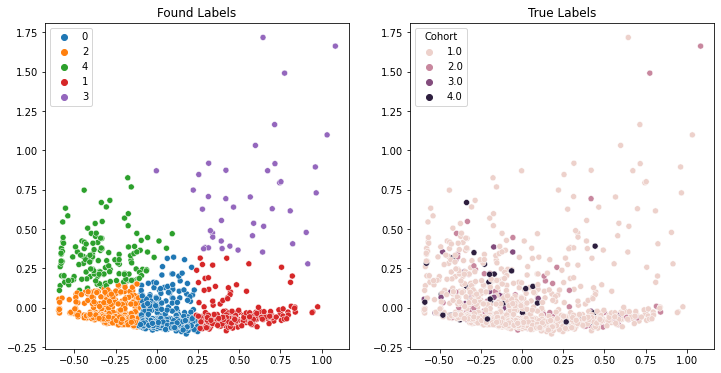

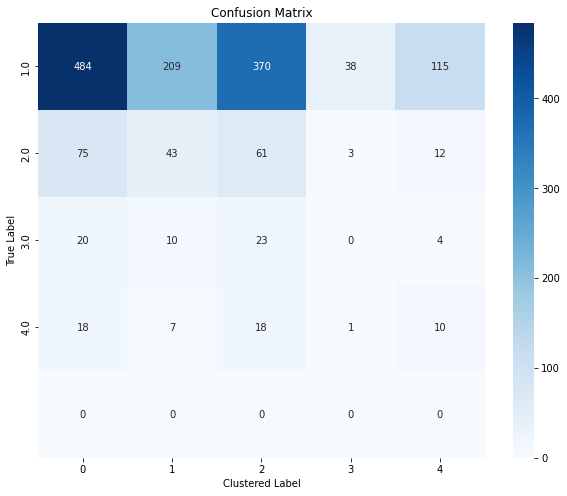

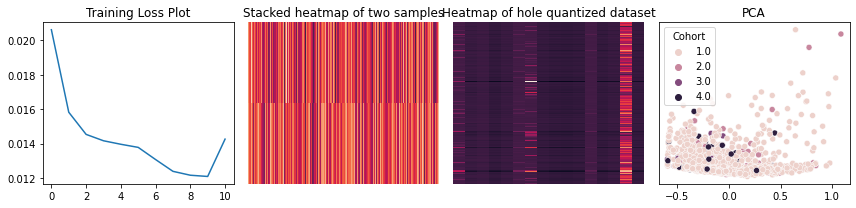

 37%|███▋      | 11/30 [09:06<36:03, 113.88s/it]

HOPKINS STATISTIC 0.9614326082321659


 40%|████      | 12/30 [11:09<35:04, 116.90s/it]

Silhouette score for 5 clusters: 0.33106958866119385


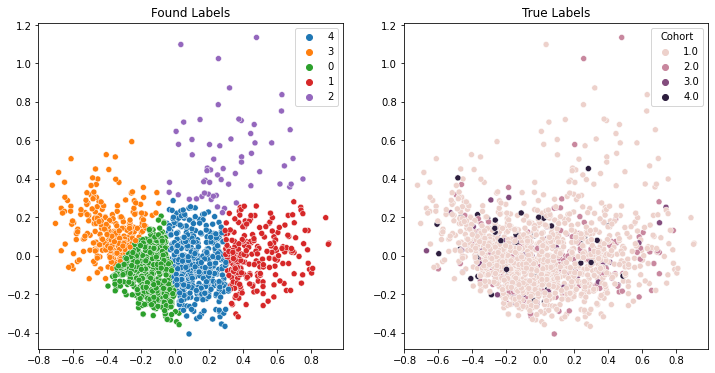

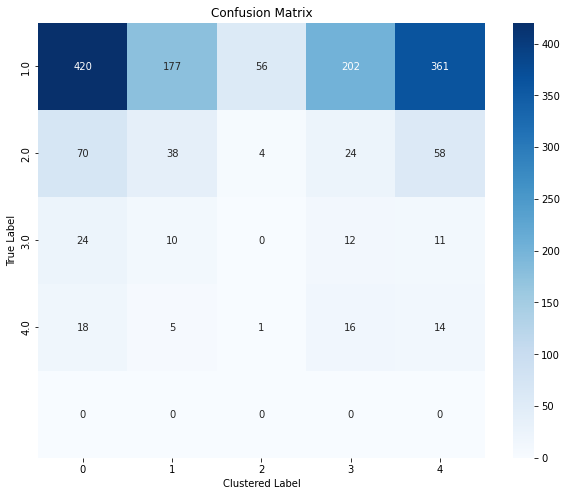

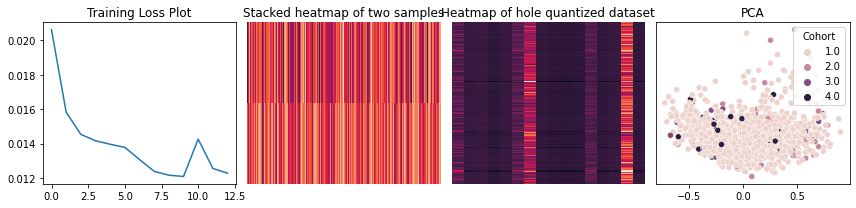

 43%|████▎     | 13/30 [21:37<1:16:57, 271.60s/it]

HOPKINS STATISTIC 0.9416764113177298


 47%|████▋     | 14/30 [33:27<1:47:43, 403.96s/it]

Silhouette score for 5 clusters: 0.3280302584171295


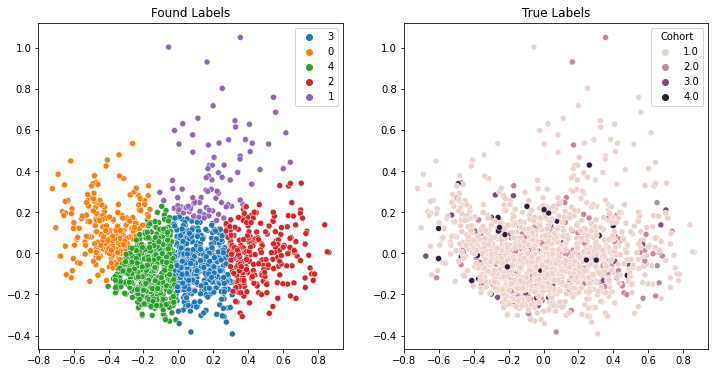

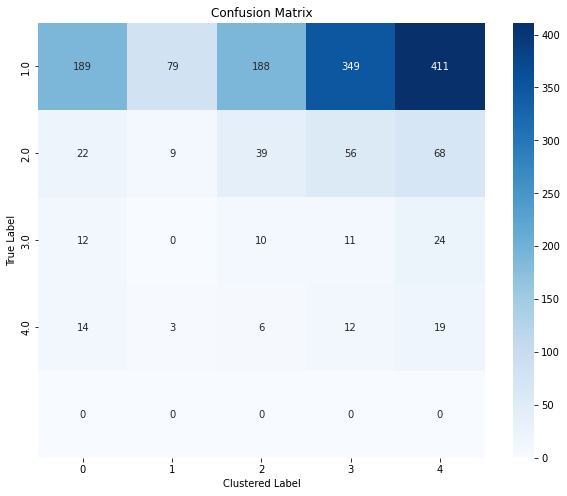

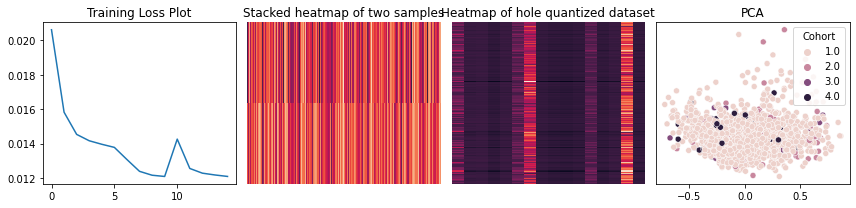

 50%|█████     | 15/30 [41:54<1:48:44, 435.00s/it]

HOPKINS STATISTIC 0.9365846868871349


 53%|█████▎    | 16/30 [48:12<1:37:30, 417.92s/it]

Silhouette score for 5 clusters: 0.3176475167274475


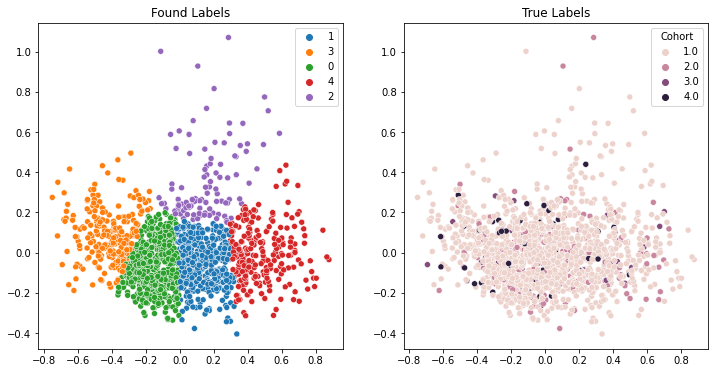

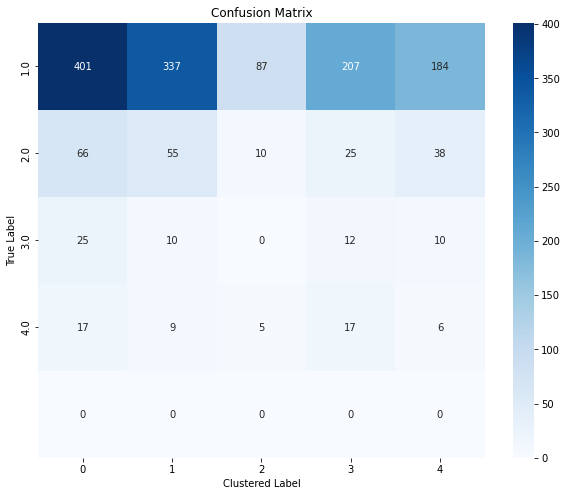

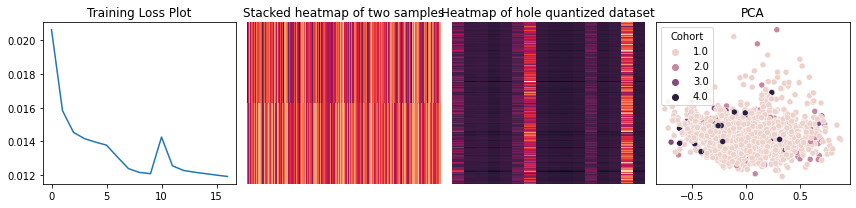

 57%|█████▋    | 17/30 [57:01<1:37:47, 451.35s/it]

HOPKINS STATISTIC 0.9333981406330404


 57%|█████▋    | 17/30 [1:07:45<51:48, 239.15s/it]


KeyboardInterrupt: 

In [8]:
best_performing_config = {'variational': False, 'convolution': True, 'transformer': False, 'dropout': 0.3, 'latent_dim': 16, 'padding': 2, 'kernel_size': 5}
data_param = '../workfiles/PPMI_genes.pkl'

e = experiment.Experiment(data_param, best_performing_config, verbose = 2, n_epoch = 30)
e.run()